In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from plotly.offline import iplot

In [79]:
file_path = r'C:\Users\Alex\Desktop\SuperStoreUS_Assignment\Cleaned_SuperStoreUS.xlsx'

orders = pd.read_excel(file_path, sheet_name='Orders')
returns = pd.read_excel(file_path, sheet_name='Returns')
users = pd.read_excel(file_path, sheet_name='Users')

In [80]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1882 entries, 0 to 1881
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Order ID              1882 non-null   int64         
 1   Order Date            1882 non-null   datetime64[ns]
 2   Ship Date             1882 non-null   datetime64[ns]
 3   Ship Mode             1882 non-null   object        
 4   Order Priority        1882 non-null   object        
 5   Customer ID           1882 non-null   int64         
 6   Customer Name         1882 non-null   object        
 7   Customer Segment      1882 non-null   object        
 8   Region                1882 non-null   object        
 9   State or Province     1882 non-null   object        
 10  City                  1882 non-null   object        
 11  Postal Code           1882 non-null   int64         
 12  Product Category      1882 non-null   object        
 13  Product Sub-Catego

In [81]:
returns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1634 entries, 0 to 1633
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Order ID  1634 non-null   int64
dtypes: int64(1)
memory usage: 12.9 KB


In [82]:
orders.head()

,Order ID,Order Date,Ship Date,Ship Mode,Order Priority,Customer ID,Customer Name,Customer Segment,Region,State or Province,...,Product Sub-Category,Product Container,Product Name,Product Base Margin,Sales,Quantity ordered,Discount,Unit Price,Shipping Cost,Profit
0,88522,2015-01-07,2015-01-08,Express Air,High,3,Bonnie Potter,Corporate,West,Washington,...,Pens & Art Supplies,Wrap Bag,SANFORD Liquid Accent™ Tank-Style Highlighters,0.54,13.01,4,0.01,2.84,0.93,4.5600
1,90193,2015-06-13,2015-06-15,Delivery Truck,Not Specified,5,Ronnie Proctor,Home Office,West,California,...,Chairs & Chairmats,Jumbo Drum,Global Troy™ Executive Leather Low-Back Tilter,0.60,6362.85,12,0.02,500.98,26.00,4390.3665
2,90192,2015-02-15,2015-02-17,Regular Air,Critical,11,Marcus Dunlap,Home Office,East,New Jersey,...,Office Furnishings,Small Pack,"DAX Two-Tone Rosewood/Black Document Frame, De...",0.45,211.15,22,0.06,9.48,7.29,-53.8096
3,86838,2015-05-12,2015-05-14,Regular Air,Medium,14,Gwendolyn F Tyson,Small Business,Central,Minnesota,...,Office Furnishings,Small Box,Howard Miller 12-3/4 Diameter Accuwave DS ™ Wa...,0.43,1164.45,16,0.09,78.69,19.99,803.4705
4,86838,2015-05-12,2015-05-13,Regular Air,Medium,14,Gwendolyn F Tyson,Small Business,Central,Minnesota,...,Pens & Art Supplies,Wrap Bag,Newell 321,0.56,22.23,7,0.08,3.28,2.31,-24.0300


In [83]:
returns.head()

,Order ID
0,65
1,612
2,614
3,678
4,710


In [84]:
users.head()

,Region,Manager
0,Central,Chris
1,East,Erin
2,South,Sam
3,West,William


In [85]:
orders['Profit Margin (%)'] = (orders['Profit'] / orders['Sales'] * 100).round(2)
orders.head()

,Order ID,Order Date,Ship Date,Ship Mode,Order Priority,Customer ID,Customer Name,Customer Segment,Region,State or Province,...,Product Container,Product Name,Product Base Margin,Sales,Quantity ordered,Discount,Unit Price,Shipping Cost,Profit,Profit Margin (%)
0,88522,2015-01-07,2015-01-08,Express Air,High,3,Bonnie Potter,Corporate,West,Washington,...,Wrap Bag,SANFORD Liquid Accent™ Tank-Style Highlighters,0.54,13.01,4,0.01,2.84,0.93,4.5600,35.05
1,90193,2015-06-13,2015-06-15,Delivery Truck,Not Specified,5,Ronnie Proctor,Home Office,West,California,...,Jumbo Drum,Global Troy™ Executive Leather Low-Back Tilter,0.60,6362.85,12,0.02,500.98,26.00,4390.3665,69.00
2,90192,2015-02-15,2015-02-17,Regular Air,Critical,11,Marcus Dunlap,Home Office,East,New Jersey,...,Small Pack,"DAX Two-Tone Rosewood/Black Document Frame, De...",0.45,211.15,22,0.06,9.48,7.29,-53.8096,-25.48
3,86838,2015-05-12,2015-05-14,Regular Air,Medium,14,Gwendolyn F Tyson,Small Business,Central,Minnesota,...,Small Box,Howard Miller 12-3/4 Diameter Accuwave DS ™ Wa...,0.43,1164.45,16,0.09,78.69,19.99,803.4705,69.00
4,86838,2015-05-12,2015-05-13,Regular Air,Medium,14,Gwendolyn F Tyson,Small Business,Central,Minnesota,...,Wrap Bag,Newell 321,0.56,22.23,7,0.08,3.28,2.31,-24.0300,-108.10


In [86]:
orders.describe(include = "all").T

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
Order ID,1882.0,NaN,NaN,NaN,82118.952179,359.0,86727.25,88339.0,89943.0,91586.0,19347.327828
Order Date,1882,NaN,NaN,NaN,2015-03-29 05:14:28.437831936,2015-01-01 00:00:00,2015-02-11 00:00:00,2015-03-28 00:00:00,2015-05-15 00:00:00,2015-06-30 00:00:00,NaN
Ship Date,1882,NaN,NaN,NaN,2015-03-31 04:17:51.200850176,2015-01-02 00:00:00,2015-02-14 00:00:00,2015-03-30 00:00:00,2015-05-16 18:00:00,2015-07-08 00:00:00,NaN
Ship Mode,1882,3,Regular Air,1381,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Order Priority,1882,6,Low,390,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Customer ID,1882.0,NaN,NaN,NaN,1716.888417,3.0,854.25,1720.0,2570.0,3403.0,991.466164
Customer Name,1882,1113,Jenny Gold,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Customer Segment,1882,4,Corporate,659,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Region,1882,4,Central,566,NaN,NaN,NaN,NaN,NaN,NaN,NaN
State or Province,1882,49,California,214,NaN,NaN,NaN,NaN,NaN,NaN,NaN


From the output, I derived the following insights:
- There are 4 customer segments, with the majority being Corporate customers.
- There are 3 product categories, consisting of 17 sub-categories.
- The highest number of orders is for Office Supplies (1021 out of 1882, which is almost 55%), and within this category, paper purchases dominate the most (around 15% of all orders).
- 75% of orders yield at least a 44% profit margin.
- The largest profit margin is 99.54%.


In [87]:
category_counts = orders['Product Category'].value_counts()
category_counts

Product Category
Office Supplies    1021
Technology          468
Furniture           393
Name: count, dtype: int64

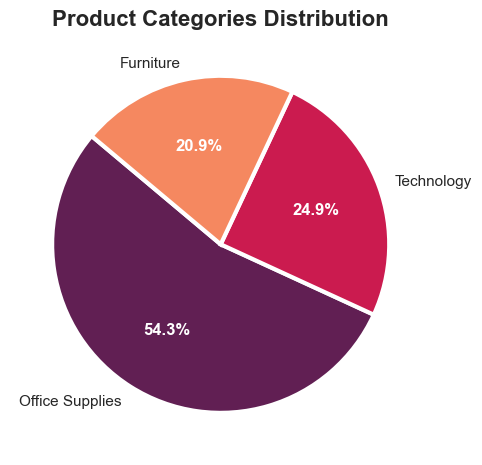

In [88]:
fig, axs = plt.subplots(figsize=(5, 5))

# Use a gradient shades
colors = sns.color_palette("rocket", len(category_counts))

# Create Pie chart
axs.pie(
    category_counts, 
    labels=category_counts.index,  
    autopct='%1.1f%%',  
    startangle=140,  
    colors=colors,  
    wedgeprops={'edgecolor': 'white', 'linewidth': 3}
)

for text in axs.texts:
    if '%' in text.get_text():  # Check if the text is percentage
        text.set_color('white')
        text.set_fontweight('bold')  # Make percentage text bold
        text.set_fontsize(12)  

axs.set_title('Product Categories Distribution', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()


- Pie chart shows that approximately 55% of products are form category Office Supplies

In [89]:
# Group sales, profit and quantity by category

order1 = (pd.DataFrame(orders.groupby(['Product Category'])[['Sales', 'Profit', 'Quantity ordered']].sum())).round(2)

order1  

,Sales,Profit,Quantity ordered
Product Category,,,
Furniture,656207.24,52150.71,4998
Office Supplies,545613.97,62695.24,13789
Technology,709246.20,64145.93,5802


- `Technology` generated the highest sales ($709,246.20), followed by Furniture and Office Supplies.
- However, `Office Supplies` generated a higher profit ($62,695.24) compared to Furniture ($52,150.71), even though it had the lowest sales.
- `Office Supplies` also had the highest quantity ordered (13,789 units), which is significantly higher than both Furniture and Technology.
- In summary, `Office Supplies` is the most profitable category relative to its sales, despite having lower sales than Technology and Furniture. 
- Furniture has the lowest profit despite having the second-highest sales


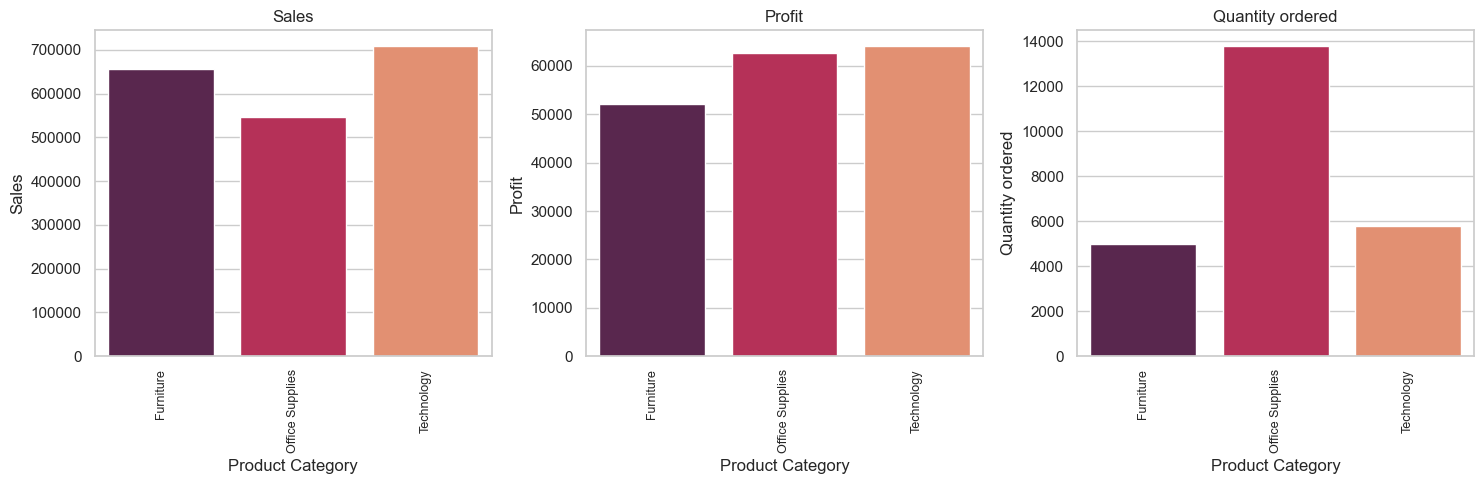

In [90]:
# Set the theme for the plots
sns.set_theme(style="whitegrid")

# Create a figure with 1 row and 3 columns
figure, axis = plt.subplots(1, 3, figsize=(15, 5))  # Increase height (15) for better spacing between plots

cat1 = sns.barplot(x = order1.index, y = order1['Sales'], ax=axis[0], hue=order1.index, palette="rocket", legend=False)
cat2 = sns.barplot(x = order1.index, y = order1['Profit'], ax=axis[1], hue=order1.index, palette="rocket", legend=False)
cat3 = sns.barplot(x = order1.index, y = order1['Quantity ordered'], ax=axis[2], hue=order1.index, palette="rocket", legend=False)

# Titles for each subplot
cat1.set(title = 'Sales')
cat2.set(title = 'Profit')
cat3.set(title = 'Quantity ordered')

# Rotate axis for x-axis
plt.setp(cat1.get_xticklabels(), rotation = 'vertical', size = 9)
plt.setp(cat2.get_xticklabels(), rotation = 'vertical', size = 9)
plt.setp(cat3.get_xticklabels(), rotation = 'vertical', size = 9)

# Adjust spacing between subplots
figure.tight_layout()

plt.show()


- Next, I grouped the data by sub-category and calculated the total sales and profit for each. Then, I  visualized the total profit and sales per sub-category using a bar plot:

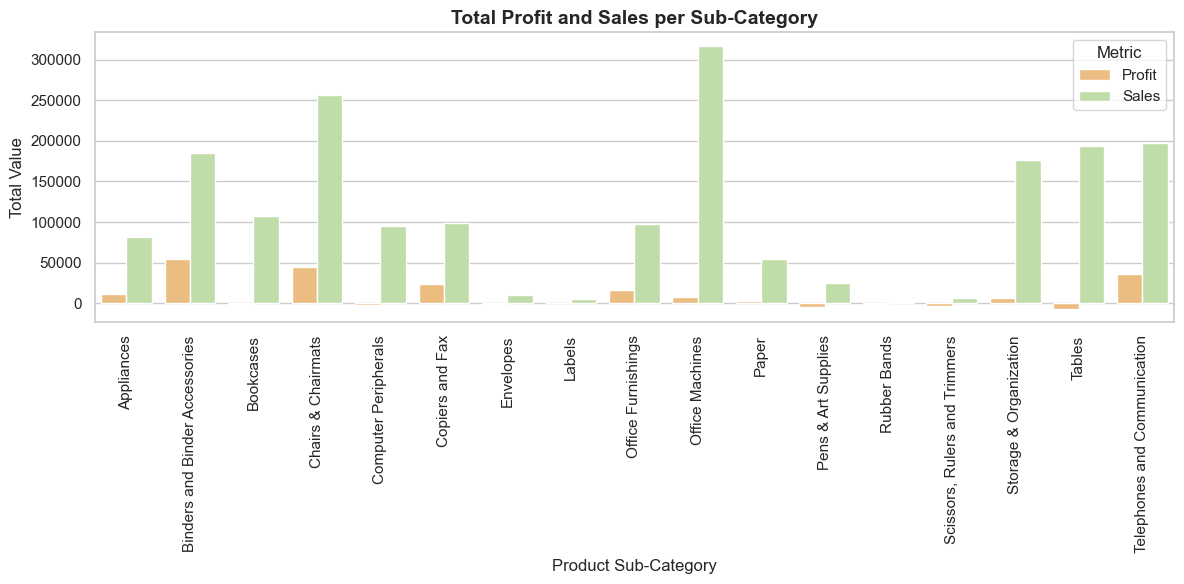

In [91]:
# Grouping data: Sum of Profit & Sales
total_values = orders.groupby('Product Sub-Category')[['Profit', 'Sales']].sum().reset_index()

# Create figure
plt.figure(figsize=(12, 6))

# Total Profit & Sales Bar Plot
sns.barplot(
    data=total_values.melt(id_vars='Product Sub-Category', var_name='Metric', value_name='Value'),
    x='Product Sub-Category', y='Value', hue='Metric', palette="Spectral"
)

# Titles and Labels
plt.title('Total Profit and Sales per Sub-Category', fontsize=14, fontweight='bold')
plt.ylabel('Total Value')
plt.xticks(rotation=90)

# Improve layout
plt.tight_layout()
plt.show()


- Based on the obtained bar chart, we can conclude that Office Machines have the highest sales compared to other sub-categories.
- Binders and Binder Accessories have the highest profit, despite having nearly half the sales of Office Machines.
- This indicates that even though Binders and Binder Accessories generate less revenue, they are more profitable, suggesting that the profit margin for this sub-category is significantly higher than that of Office Machines.


In [92]:
# Group by sub-category

orders2 = pd.DataFrame(orders.groupby(['Product Sub-Category'])[['Sales', 'Profit']].sum()).round(2)

# Sort by descending order according to sales

sub_cat_profit = pd.DataFrame(orders2.sort_values('Profit', ascending = False))

sub_cat_profit

,Sales,Profit
Product Sub-Category,,
Binders and Binder Accessories,184561.11,54415.76
Chairs & Chairmats,257002.57,44360.76
Telephones and Communication,197775.14,35832.89
Copiers and Fax,99069.48,23990.21
Office Furnishings,97644.00,15960.46
Appliances,81374.52,10956.66
Office Machines,317678.59,7235.04
Storage & Organization,176602.00,6101.47
Paper,54769.69,2171.91


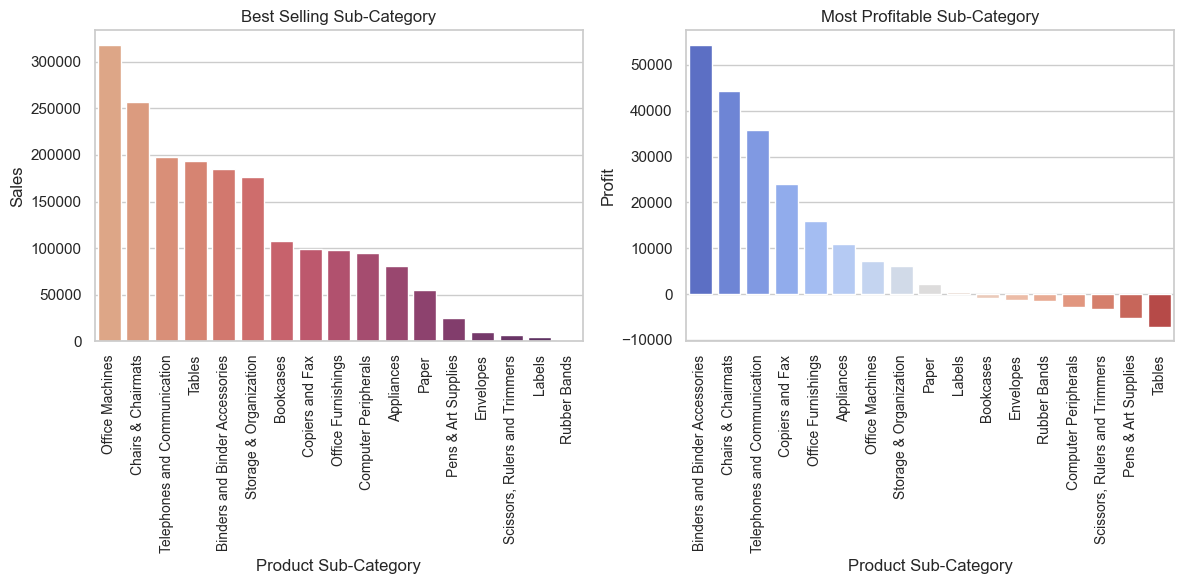

In [93]:
sub_cat_sales = pd.DataFrame(orders2.sort_values('Sales', ascending = False))

sns.set_theme(style="whitegrid")

figure, axis = plt.subplots(1, 2, figsize=(12, 6))

# Best Selling Sub-Category (Sales)
subcat1 = sns.barplot(data=sub_cat_sales, x=sub_cat_sales.index, y=sub_cat_sales.Sales, 
                      hue=sub_cat_sales.index, legend=False, ax=axis[0], palette="flare")
subcat1.set(title="Best Selling Sub-Category")

# Fix tick labels
axis[0].set_xticks(range(len(sub_cat_sales.index)))
axis[0].set_xticklabels(sub_cat_sales.index, rotation="vertical", size=10)

# Most Profitable Sub-Category (Profit)
subcat2 = sns.barplot(data=sub_cat_profit, x=sub_cat_profit.index, y=sub_cat_profit.Profit, 
                      hue=sub_cat_profit.index, legend=False, ax=axis[1], palette="coolwarm")
subcat2.set(title="Most Profitable Sub-Category")

# Fix tick labels
axis[1].set_xticks(range(len(sub_cat_profit.index)))
axis[1].set_xticklabels(sub_cat_profit.index, rotation="vertical", size=10)

# Adjust layout
figure.tight_layout()
plt.show()

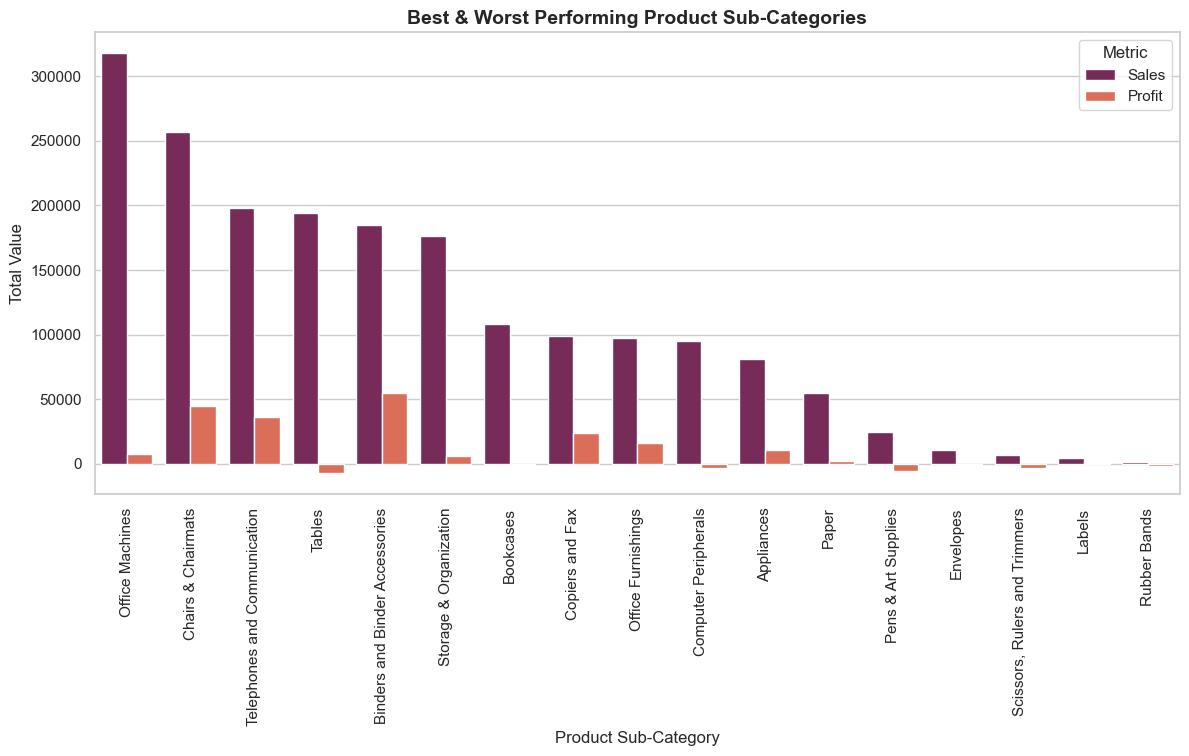

In [94]:
# Group data by Product Sub-Category
subcat_sales_profit = orders.groupby('Product Sub-Category')[['Sales', 'Profit']].sum().reset_index()

# Sort by Sales (Descending)
subcat_sales_profit = subcat_sales_profit.sort_values('Sales', ascending=False)

# Plot
plt.figure(figsize=(14, 6))
sns.barplot(data=subcat_sales_profit.melt(id_vars='Product Sub-Category', var_name='Metric', value_name='Value'),
            x='Product Sub-Category', y='Value', hue='Metric', palette='rocket')

# Titles & Labels
plt.title('Best & Worst Performing Product Sub-Categories', fontsize=14, fontweight='bold')
plt.xlabel('Product Sub-Category', fontsize=12)
plt.ylabel('Total Value', fontsize=12)
plt.xticks(rotation=90)
plt.legend(title='Metric')

plt.show()


- I visualized the distribution of product sub-categories across different regions using a count plot

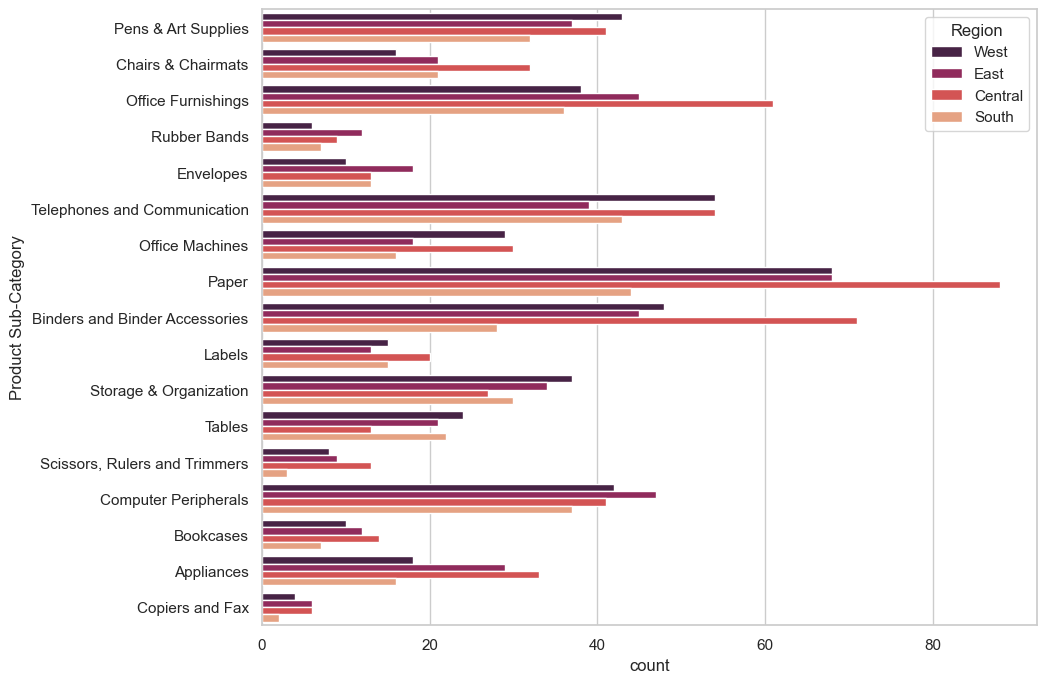

In [95]:
plt.figure(figsize=(10, 8))

sns.countplot(y="Product Sub-Category", hue="Region", palette='rocket', data=orders)

plt.show()


- Based on the analysis, we can conclude that `paper products` are the most sold items across all regions of the United States, as seen from the distribution and sales data. The Central region stands out with the highest sales, dominating the other regions
- On the other hand, the `Copiers and Fax` sub-category shows the lowest sales across all four regions, consistently underperforming compared to other product sub-categories


- I grouped the sales by region and created a donut chart to visualize the proportion of sales across regions.

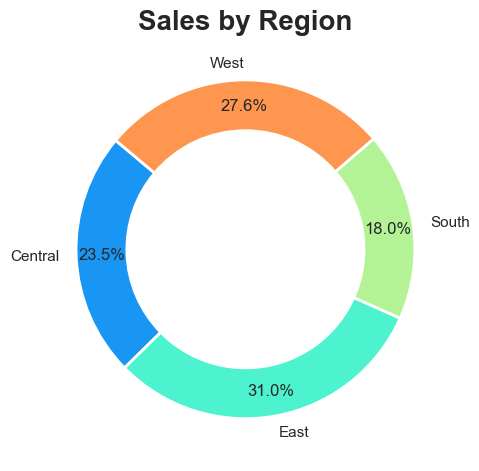

In [96]:
# Assuming your 'orders' DataFrame is already loaded
# Group data by Region and sum the Sales
region_sales = orders.groupby('Region')['Sales'].sum().reset_index()

# Create donut chart
plt.figure(figsize=(5, 8))
plt.pie(region_sales['Sales'], labels=region_sales['Region'], autopct='%1.1f%%', startangle=140, 
        colors=sns.color_palette('rainbow', len(region_sales)), wedgeprops={'edgecolor': 'white', 'linewidth': 2, 'width': 0.3}, 
        pctdistance=0.85)  # Moves percentage inside

# Set title
plt.title('Sales by Region', fontsize=20, fontweight='bold')

# Display the plot
plt.tight_layout()
plt.show()

- Based on the donut chart, we can observe that no single region has a dominant share in the total sales
- These proportions indicate a fairly balanced distribution of sales across the region

- I created a line chart to display the sales trend over time for each region, showing sales changes over the months:

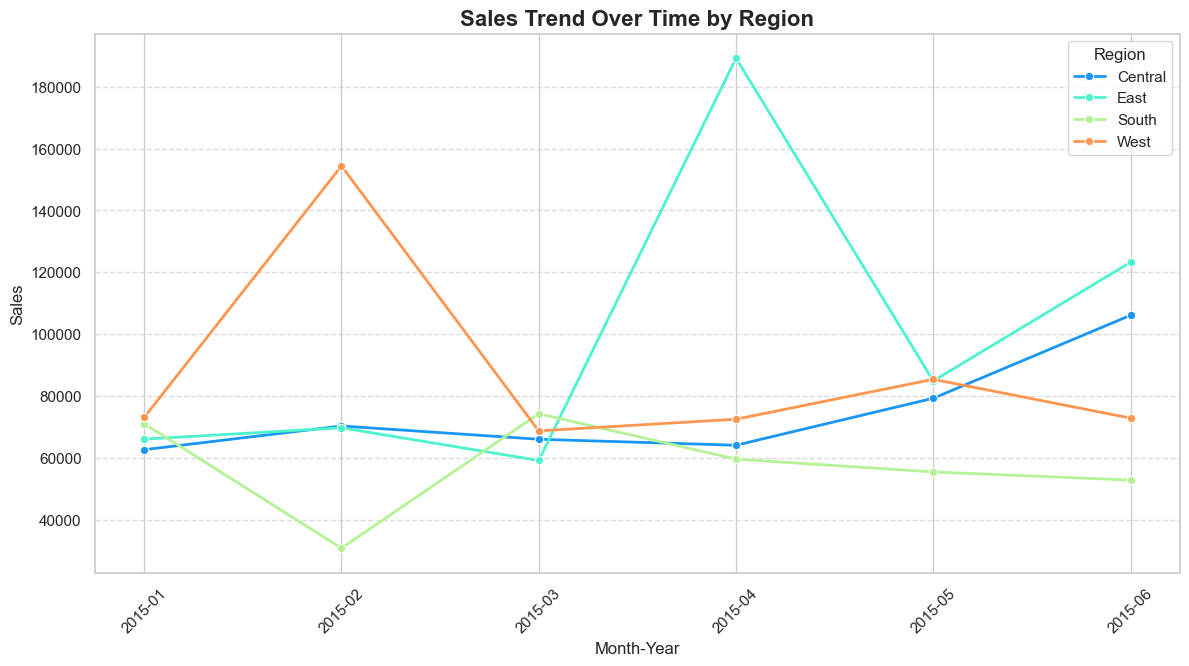

In [97]:
# Extract year-month for time series grouping
orders["Year-Month"] = orders["Order Date"].dt.to_period("M").astype(str)

# Aggregate sales and profit over time for each region
time_region_data = orders.groupby(["Year-Month", "Region"])[["Sales", "Profit"]].sum().reset_index()

# Create figure
plt.figure(figsize=(14, 7))

# Line chart for Sales
sns.lineplot(data=time_region_data, x="Year-Month", y="Sales", hue="Region", marker="o", linewidth=2, palette="rainbow")

# Titles and labels
plt.title("Sales Trend Over Time by Region", fontsize=16, fontweight="bold")
plt.xlabel("Month-Year")
plt.ylabel("Sales")
plt.xticks(rotation=45)

# Show legend
plt.legend(title="Region")

# Show plot
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


- In April 2015, the East region recorded the highest sales, which also represents the peak sales for the entire period in comparison to the other regions. On the other hand, the South region had the lowest sales (February 2015) in this period of 6 months, marking the least sales, when compared to the other regions as well.

In [98]:
# Calculate the shipping days by subtracting 'Order Date' from 'Ship Date'
orders['Shipping Time'] = (orders['Ship Date'] - orders['Order Date']).dt.days

# Group by 'Product Sub-Category' and calculate the average shipping days
avg_shipping_days = orders.groupby('Product Sub-Category')['Shipping Time'].mean().reset_index().round(2)

# Sort by 'Delivery Time' in descending order
avg_shipping_days_sorted = avg_shipping_days.sort_values('Shipping Time', ascending=False)

avg_shipping_days_sorted

,Product Sub-Category,Shipping Time
5,Copiers and Fax,2.44
12,Rubber Bands,2.41
6,Envelopes,2.31
2,Bookcases,2.19
0,Appliances,2.18
14,Storage & Organization,2.16
9,Office Machines,2.01
3,Chairs & Chairmats,1.99
8,Office Furnishings,1.96
1,Binders and Binder Accessories,1.94


- The shortest shipping time, on average, is 1.5 days for `Tables`, which is the fastest shipping time among all sub-categories. - Following closely are the `Scissors, Rulers and Trimmers` and `Labels` sub-categories, both with an average shipping time of 1.7 days. 
- On the other hand, the `Copiers and Fax` category has the longest shipping time, with an average of 2.4 days.


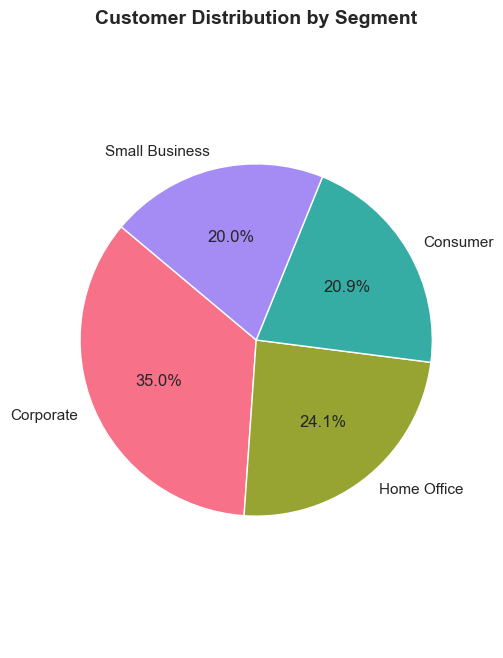

In [99]:
# Group by Customer Segment and count the number of customers
segment_counts = orders['Customer Segment'].value_counts()

# Create the pie chart
plt.figure(figsize=(5, 8))
plt.pie(segment_counts, labels=segment_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("husl", len(segment_counts)))

# Title
plt.title('Customer Distribution by Segment', fontsize=14, fontweight='bold')

# Display the chart
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is circular.
plt.show()


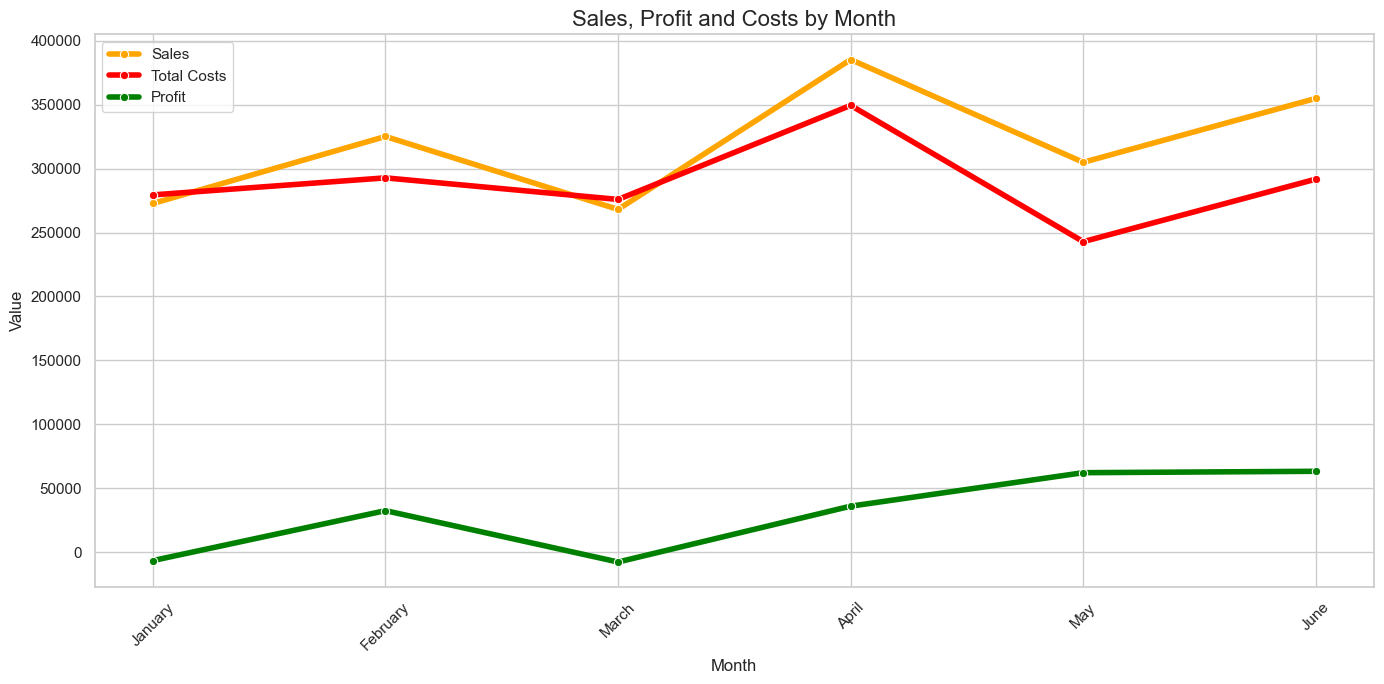

In [100]:
# Extract the month and year from 'Order Date', and convert to full month name
orders['Month'] = orders['Order Date'].dt.strftime('%B')  # This converts to full month name like 'January', 'February', etc.
orders['Total Costs'] = orders['Sales'] - orders['Profit']

# Group by month and aggregate sales and quantity
monthly_data = orders.groupby('Month')[['Sales', 'Profit', 'Total Costs']].sum().reset_index()

# Ensure that months are ordered chronologically
monthly_data['Month'] = pd.to_datetime(monthly_data['Month'], format='%B').dt.month
monthly_data = monthly_data.sort_values('Month')

# Convert month numbers back to full month names
monthly_data['Month'] = monthly_data['Month'].apply(lambda x: pd.to_datetime(str(x), format='%m').strftime('%B'))

# Create the figure and axis for the plot
plt.figure(figsize=(14, 7))

# Create the line chart for quantity
sns.lineplot(x='Month', y='Sales', data=monthly_data, color='orange', marker='o', label='Sales', linewidth=4)
sns.lineplot(x='Month', y='Total Costs', data=monthly_data, color='red', marker='o', label='Total Costs', linewidth=4)
sns.lineplot(x='Month', y='Profit', data=monthly_data, color='green', marker='o', label='Profit', linewidth=4)

# Set titles and labels
plt.title('Sales, Profit and Costs by Month', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Value', fontsize=12)

# Rotate the x-axis labels for readability
plt.xticks(rotation=45)

# Add legend to the plot
plt.legend()

# Improve the layout and show the plot
plt.tight_layout()
plt.show()

In [101]:
# Merge the Orders dataset with the Returns dataset on 'Order ID'
merged_data = pd.merge(orders, returns, on='Order ID', how='left')

# Create a new column indicating whether an order was returned (1 for returned, 0 for not)
merged_data['Returned'] = merged_data['Order ID'].isin(returns['Order ID']).astype(int).round(3)

# Group by Product Category and calculate the return rate
return_rate = merged_data.groupby('Product Category')['Returned'].mean().reset_index().round(3)

# Convert to percentage
return_rate['Return Rate (%)'] = return_rate['Returned'] * 100

# Sort by return rate
return_rate_sorted = return_rate.sort_values('Return Rate (%)', ascending=False)

# Display the return rates
return_rate_sorted


,Product Category,Returned,Return Rate (%)
1,Office Supplies,0.011,1.1
0,Furniture,0.005,0.5
2,Technology,0.004,0.4


C:\Users\Alex\AppData\Local\Temp\ipykernel_6096\325073253.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




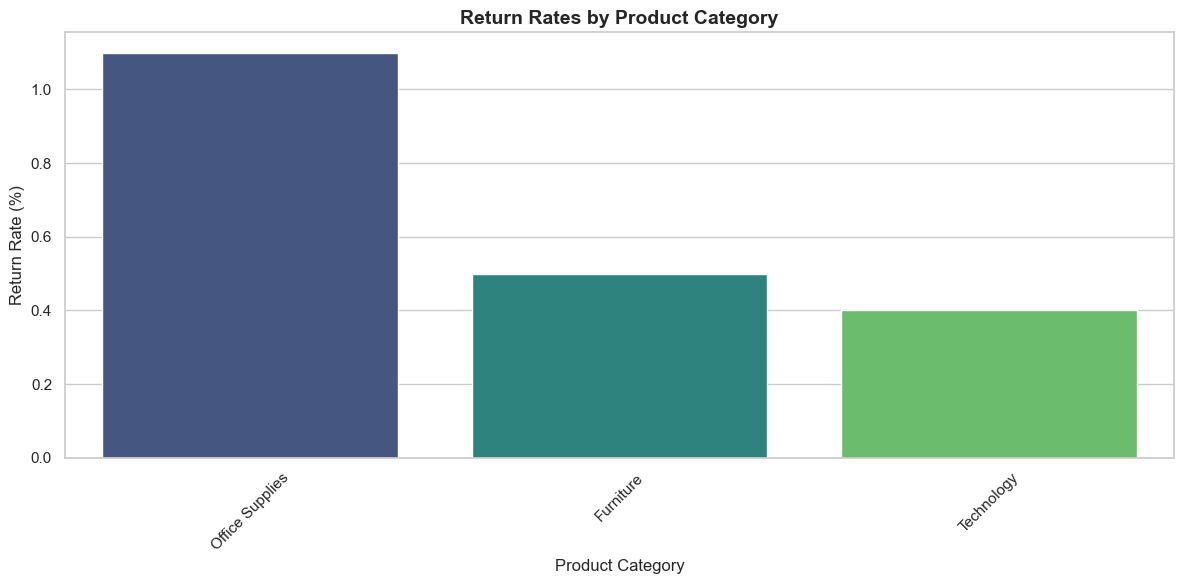

In [102]:
# Plot the return rates by product category
plt.figure(figsize=(12, 6))

sns.barplot(
    data=return_rate_sorted,
    x='Product Category',
    y='Return Rate (%)',
    palette='viridis'  # Remove 'hue' and just use the palette for the bars
)

# Titles and Labels
plt.title('Return Rates by Product Category', fontsize=14, fontweight='bold')
plt.xlabel('Product Category', fontsize=12)
plt.ylabel('Return Rate (%)', fontsize=12)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


- To represent Managers by profit and sales, I opted for bar charts
- Since Managers are in the ‘Users’ table and Sales and Profit are in the ‘Orders’, you need to merge these two datasets before creating the visualizations.

C:\Users\Alex\AppData\Local\Temp\ipykernel_6096\1269116269.py:15: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\Alex\AppData\Local\Temp\ipykernel_6096\1269116269.py:22: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




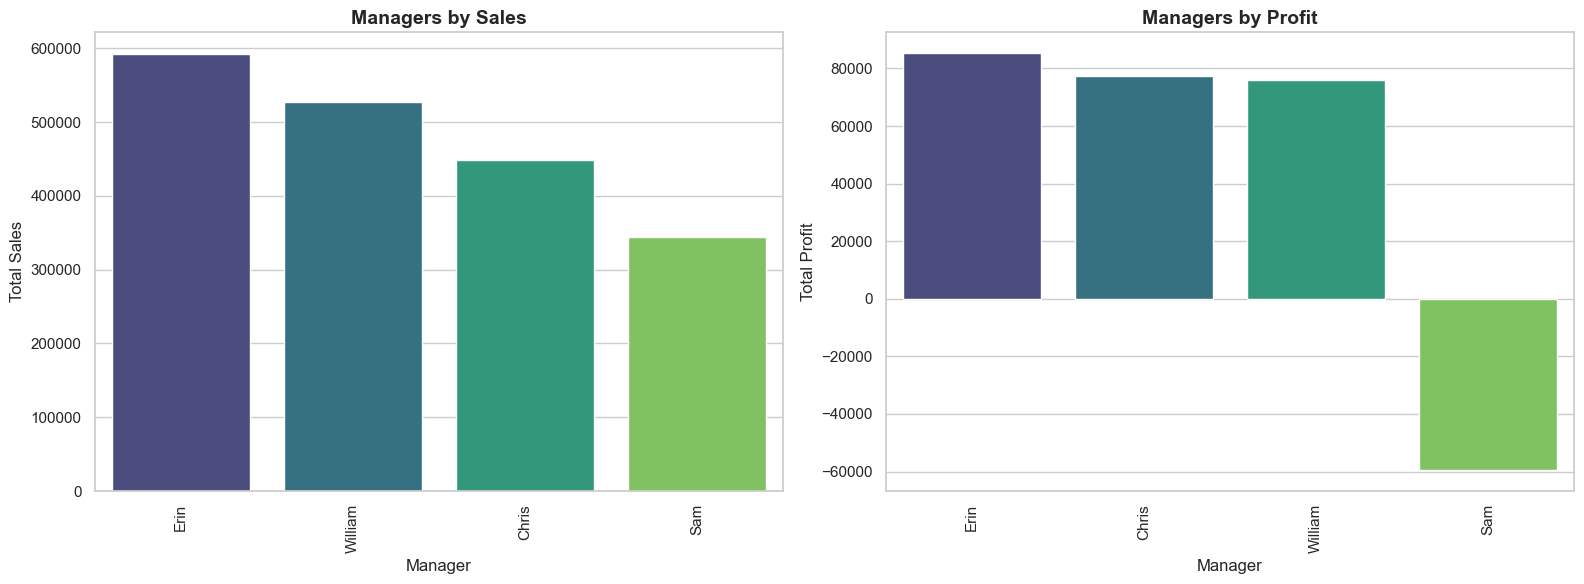

In [109]:
# Merge Orders with Users on 'Region' column
merged_data = pd.merge(orders, users, on='Region', how='left')

# Group the merged data by Manager to calculate total sales and profit
manager_sales_profit = merged_data.groupby('Manager')[['Sales', 'Profit']].sum().reset_index()

# Sort the data by sales and profit in descending order
manager_sales_profit_sorted_sales = manager_sales_profit.sort_values('Sales', ascending=False)
manager_sales_profit_sorted_profit = manager_sales_profit.sort_values('Profit', ascending=False)

# Set up the figure and axis for the plots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Bar plot for Managers by Sales
sns.barplot(data=manager_sales_profit_sorted_sales, x='Manager', y='Sales', ax=axes[0], palette="viridis")
axes[0].set_title('Managers by Sales', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Manager', fontsize=12)
axes[0].set_ylabel('Total Sales', fontsize=12)
axes[0].tick_params(axis='x', rotation=90)

# Bar plot for Managers by Profit
sns.barplot(data=manager_sales_profit_sorted_profit, x='Manager', y='Profit', ax=axes[1], palette="viridis")
axes[1].set_title('Managers by Profit', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Manager', fontsize=12)
axes[1].set_ylabel('Total Profit', fontsize=12)
axes[1].tick_params(axis='x', rotation=90)

# Adjust layout for better readability
plt.tight_layout()

# Show the plots
plt.show()


- Erin is the best manager when looking at both profit and sales. When analyzing profit, Chris follows Erin, and then comes William, although the difference in profits between Chris and William is very small. The only manager incurring losses is Sam, with a loss of around $60,000, even though his sales aren't significantly different from the other three regional managers.